In [1]:
import pandas as pd
import numpy as np
import Aquire
import Prepare
import Explore
import Model
import matplotlib.pyplot as plt
import seaborn as sns


import warnings 
warnings.filterwarnings('ignore')

import graphviz
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import recall_score, precision_score

In [2]:
original_df = Aquire.get_telco_data()

In [3]:
original_df.churn.value_counts()

No     5174
Yes    1869
Name: churn, dtype: int64

In [4]:
#raw data, with joins. joins allow my intial analysis more clear

In [5]:
#7043 customers
original_df.shape

(7043, 24)

In [6]:
#Initital things to check for
#drop duplicates, check for nulls
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               7043 non-null   object 
 1   gender                    7043 non-null   object 
 2   senior_citizen            7043 non-null   int64  
 3   partner                   7043 non-null   object 
 4   dependents                7043 non-null   object 
 5   tenure                    7043 non-null   int64  
 6   phone_service             7043 non-null   object 
 7   multiple_lines            7043 non-null   object 
 8   internet_service_type_id  7043 non-null   int64  
 9   online_security           7043 non-null   object 
 10  online_backup             7043 non-null   object 
 11  device_protection         7043 non-null   object 
 12  tech_support              7043 non-null   object 
 13  streaming_tv              7043 non-null   object 
 14  streamin

In [7]:
original_df

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,0016-QLJIS,Female,0,Yes,Yes,65,Yes,Yes,1,Yes,...,Yes,3,Yes,2,90.45,5957.9,No,Two year,DSL,Mailed check
1,0017-DINOC,Male,0,No,No,54,No,No phone service,1,Yes,...,No,3,No,4,45.20,2460.55,No,Two year,DSL,Credit card (automatic)
2,0019-GFNTW,Female,0,No,No,56,No,No phone service,1,Yes,...,No,3,No,3,45.05,2560.1,No,Two year,DSL,Bank transfer (automatic)
3,0056-EPFBG,Male,0,Yes,Yes,20,No,No phone service,1,Yes,...,No,3,Yes,4,39.40,825.4,No,Two year,DSL,Credit card (automatic)
4,0078-XZMHT,Male,0,Yes,No,72,Yes,Yes,1,No,...,Yes,3,Yes,3,85.15,6316.2,No,Two year,DSL,Bank transfer (automatic)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9962-BFPDU,Female,0,Yes,Yes,1,Yes,No,3,No internet service,...,No internet service,1,No,2,20.05,20.05,No,Month-to-month,None,Mailed check
7039,9967-ATRFS,Female,0,No,No,19,Yes,No,3,No internet service,...,No internet service,1,No,2,19.90,367.55,No,Month-to-month,None,Mailed check
7040,9970-QBCDA,Female,0,No,No,6,Yes,No,3,No internet service,...,No internet service,1,No,4,19.70,129.55,No,Month-to-month,None,Credit card (automatic)
7041,9975-SKRNR,Male,0,No,No,1,Yes,No,3,No internet service,...,No internet service,1,No,2,18.90,18.9,No,Month-to-month,None,Mailed check


In [8]:
#pre-clean data dropped duplicate column names from the join
original_df = Prepare.prep_original(original_df)
original_df.shape

(7043, 24)

In [9]:
###ORIGINAL EXPLORE####

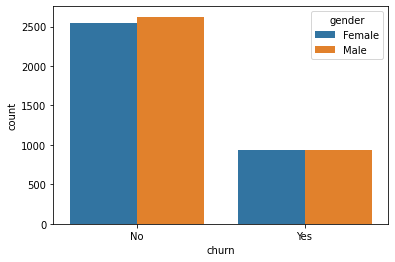

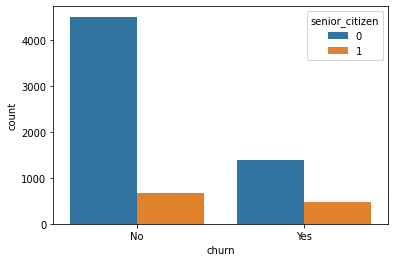

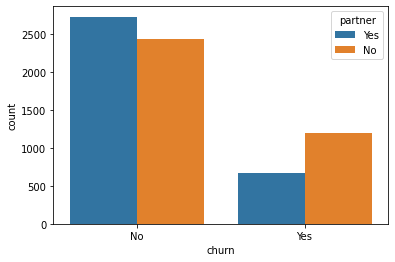

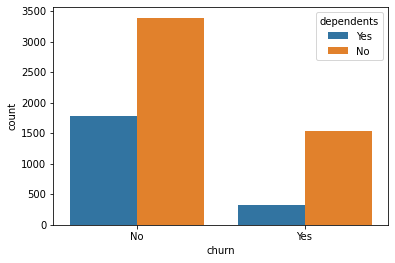

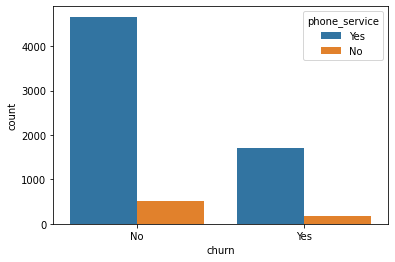

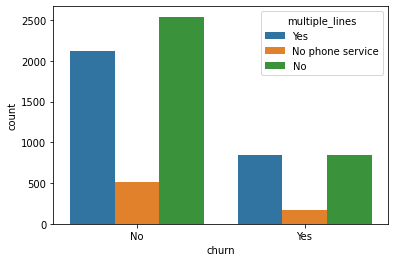

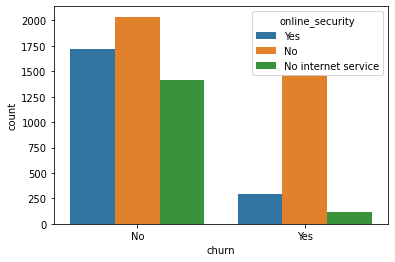

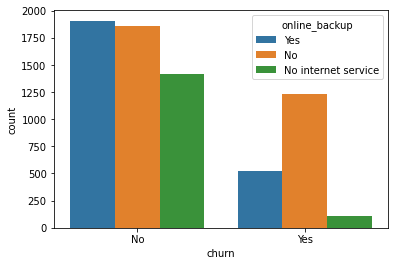

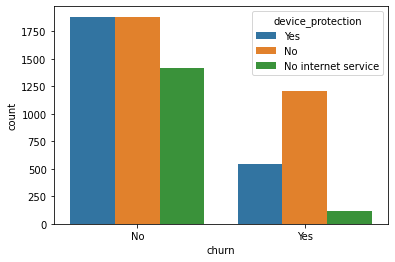

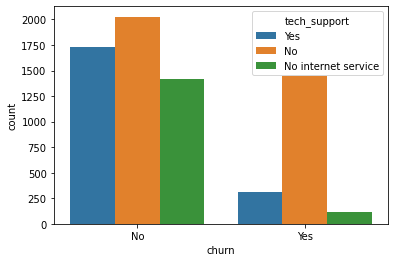

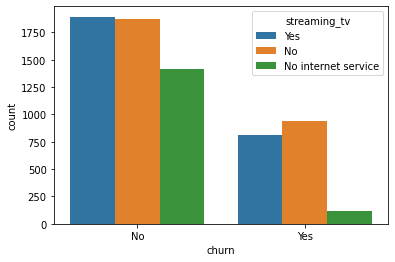

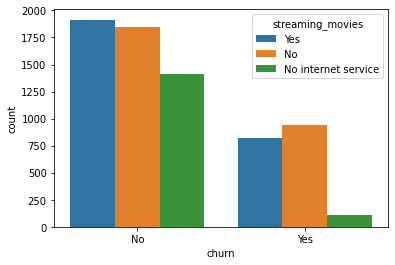

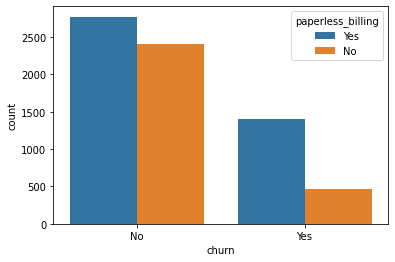

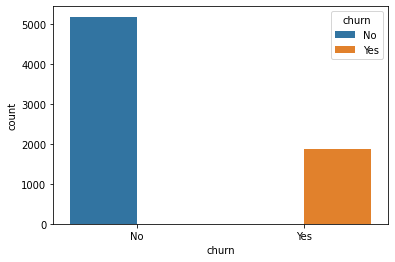

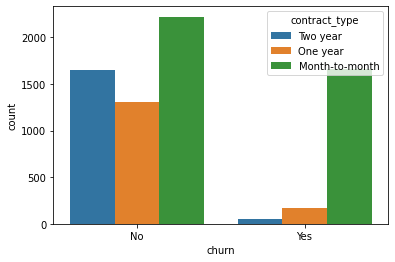

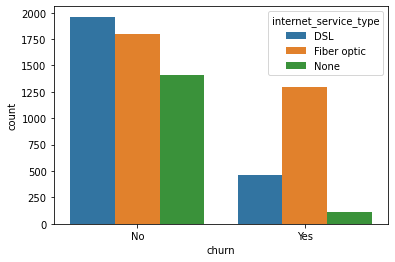

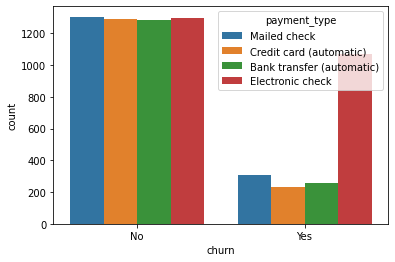

In [10]:
#store explore findings here after
Explore.get_bi_stats(original_df.drop(columns=['tenure','monthly_charges','customer_id','total_charges','internet_service_type_id', 'payment_type_id','contract_type_id']))

In [11]:
####MAKE TABLE BINARY######

In [12]:
binary_df = Prepare.prep_for_model(original_df)

<AxesSubplot:title={'center':'Feautures  Correlating with Churn'}>

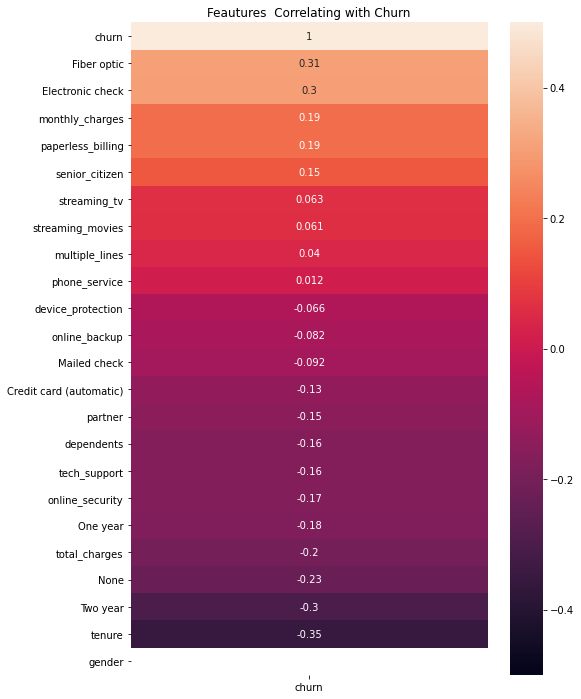

In [13]:
Explore.get_churn_heatmap(binary_df)

In [14]:
#choosing my drivers for churn
#positive correlation, top 3 = fiber optic, electronic_check, monthly Charges
#negetive correlation(as these numbers decrease in count,churn increases), top 3 = tenure, two_year, none(no_internet)

In [15]:
###MODELING###

In [16]:
###HO The specified columns above do not affect churn rate
###HA The specidied columns above significantly affect rate

In [17]:
train, validate, test = Prepare.telco_split(binary_df)

In [18]:
train.shape , validate.shape, test.shape

((3943, 25), (1691, 25), (1409, 25))

In [19]:
x_col = ['Fiber optic','Electronic check', 'monthly_charges', 'tenure', 'Two year', 'None']
y_col = 'churn'

In [20]:
X_train = train[x_col]
y_train = train[y_col]

X_validate = validate[x_col]
y_validate = validate[y_col]

X_test = test[x_col]
y_test = test[y_col]

In [21]:
#baseline prediction
#baseline is the mode of our target. 
train.churn.value_counts()

0    2897
1    1046
Name: churn, dtype: int64

In [22]:
#set baseline case to one in which no one churns
#positive 
base_model = DummyClassifier(strategy='constant', constant=0)
Model.train_validate_results(base_model, X_train, y_train, X_validate, y_validate)

Train model Accuracy: 73.47198 % | Validate model accuracy: 73.44766 % 
Train model Recall: 100.00000 % | Validate model Recall: 100.00000 %
Train model Precision: 73.47198 % | Validate model Precision: 73.44766 %


In [23]:
###CHECK TO SEE WHICH MODEL WE USE###

In [24]:
logistic_regression_1 = LogisticRegression(C=0.01,max_iter=250)

In [25]:
Model.train_validate_results(logistic_regression_1, X_train, y_train, X_validate, y_validate)

Train model Accuracy: 79.43190 % | Validate model accuracy: 79.12478 % 
Train model Recall: 91.47394 % | Validate model Recall: 90.74074 %
Train model Precision: 82.45177 % | Validate model Precision: 82.56410 %


In [26]:
##KNN

In [27]:
model2 = KNeighborsClassifier(n_neighbors=15)

In [28]:
Model.train_validate_results(model2, X_train, y_train, X_validate, y_validate)

Train model Accuracy: 81.05503 % | Validate model accuracy: 76.93672 % 
Train model Recall: 91.47394 % | Validate model Recall: 88.32528 %
Train model Precision: 84.12698 % | Validate model Precision: 81.74367 %


In [29]:
#DECISION TREE

In [30]:
model3 = DecisionTreeClassifier(max_depth= 5,max_leaf_nodes=500)

In [31]:
Model.train_validate_results(model3, X_train, y_train, X_validate, y_validate)

Train model Accuracy: 80.06594 % | Validate model accuracy: 78.23773 % 
Train model Recall: 89.88609 % | Validate model Recall: 87.60064 %
Train model Precision: 84.08137 % | Validate model Precision: 83.56375 %


In [32]:
#Random forest

In [82]:
model4 = RandomForestClassifier(max_depth=5, max_leaf_nodes=250)

In [83]:
Model.train_validate_results(model4, X_train, y_train, X_validate, y_validate )

Train model Accuracy: 80.42100 % | Validate model accuracy: 79.59787 % 
Train model Recall: 91.92268 % | Validate model Recall: 91.06280 %
Train model Precision: 83.19275 % | Validate model Precision: 82.85714 %


In [84]:
##meausure for recall. when our positive is 0 or 'Not Churn'
#worst case scenerio is prediciting someone to churn when they didnt. 
#recall allows us to calculate the ratio of no churn predictions correct to all no churn predictions
#recall tells us how accurate our model is at predicting 'no churn'
#best model to use here for recall is our random forest model

In [85]:
Model.test_results(model4, X_test, y_test ,details=True)

Test model Accuracy: 82.25692 %
Test model Recall: 94.78261 % 
Test model Precision: 83.34749 %
---------- More Details ------------
-----Test Classification report----
                     0           1  accuracy    macro avg  weighted avg
precision     0.833475    0.767241  0.822569     0.800358      0.815894
recall        0.947826    0.475936  0.822569     0.711881      0.822569
f1-score      0.886980    0.587459  0.822569     0.737219      0.807476
support    1035.000000  374.000000  0.822569  1409.000000   1409.000000
-----Train Confusion Matrix------
               Actual No Churn  Actual Churn 
Pred No Churn              981            196
Pred Churn                  54            178


In [92]:
#get high risk customers 
highrisk_df = Model.get_customer_predictions(model4, test, X_test, churn_status=0 ,high_risk_percentage=.65)

In [93]:
highrisk_df

,customer_id,churn,churn prediction,churn probability
4144,3489-HHPFY,0,1,81.835694
4073,3191-CSNMG,0,1,81.446922
4553,5339-PXDVH,0,1,80.188541
3652,1251-STYSZ,0,1,79.537823
5449,9717-QEBGU,0,1,77.527245
4443,4854-CIDCF,0,1,75.007176
3425,0187-QSXOE,0,1,71.696814
4510,5168-MSWXT,0,1,71.458502
5510,9957-YODKZ,0,1,71.394668
3486,0432-CAJZV,0,1,71.300795
